In [120]:
library(nycflights13) # for flights
library(tidyr) # for gather
library(dplyr) # for glimpse
library(tidyverse) # for ggplot2
library(janitor) # for clean_names
library(corrplot) # for corrplot
library(GGally) # for ggpairs

In [121]:
data <- read_csv("../data/diabetes_012_health_indicators_BRFSS2015.csv")
data <- clean_names(data)
glimpse(data)

Rows: 253680 Columns: 22
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (22): Diabetes_012, HighBP, HighChol, CholCheck, BMI, Smoker, Stroke, He...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 253,680
Columns: 22
$ diabetes_012           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0,…
$ high_bp                <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,…
$ high_chol              <dbl> 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,…
$ chol_check             <dbl> 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,…
$ bmi                    <dbl> 40, 25, 28, 27, 24, 25, 30, 25, 30, 24, 25, 34,…
$ smoker                 <dbl> 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,…
$ stroke                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,…
$ heart_diseaseor_attack <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ phys_activity          <dbl> 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,…
$ fruits                 <dbl> 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,…
$ veggies                <dbl> 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,…
$ hvy_alcohol_consump    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ any_healthca

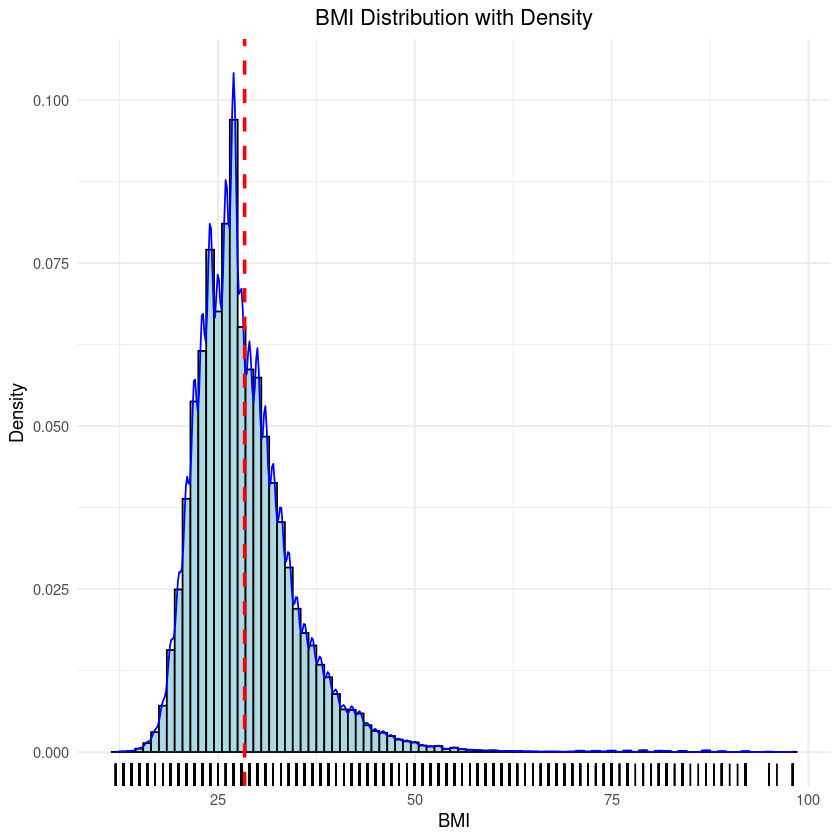

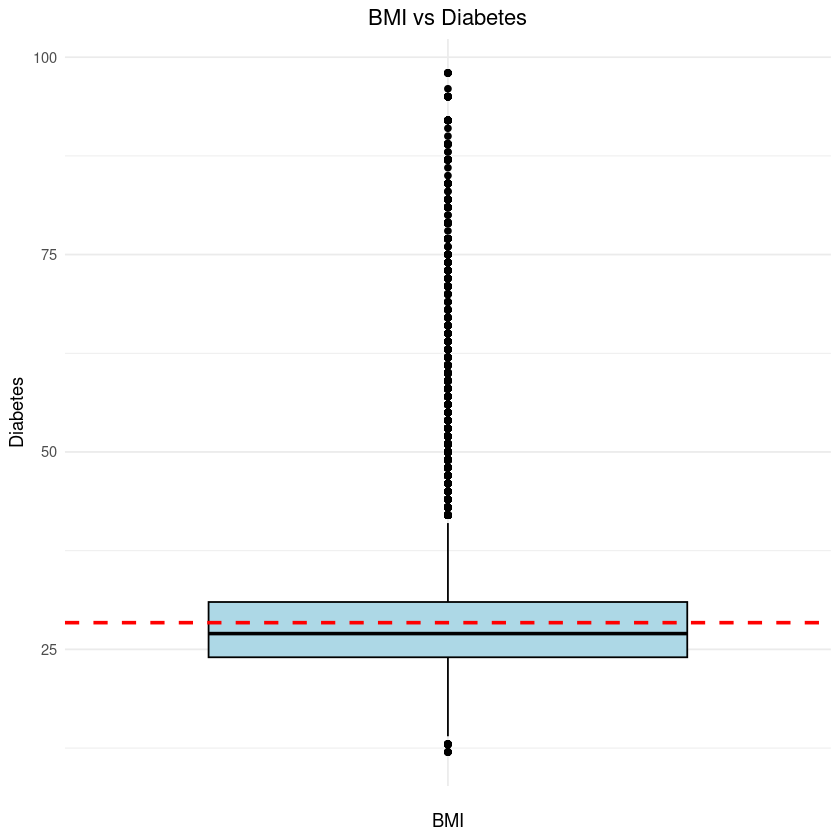

In [122]:
ggplot(data = data, aes(x = bmi)) + 
    geom_histogram(aes(y = ..density..), binwidth = 1, fill = "lightblue", color = "black", bins = 30) + 
    geom_density(color = "blue", bw = "nrd0", kernel = "gaussian") + 
    geom_rug() +
    labs(title = "BMI Distribution with Density", x = "BMI", y = "Density") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(aes(xintercept = mean(bmi)), color = "red", linetype = "dashed", size = 1)

ggplot(data = data, aes(x = "", y = bmi)) + 
    geom_boxplot(fill = "lightblue", color = "black") + 
    labs(title = "BMI vs Diabetes", x = "BMI", y = "Diabetes") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_hline(aes(yintercept = mean(bmi)), color = "red", linetype = "dashed", size = 1)

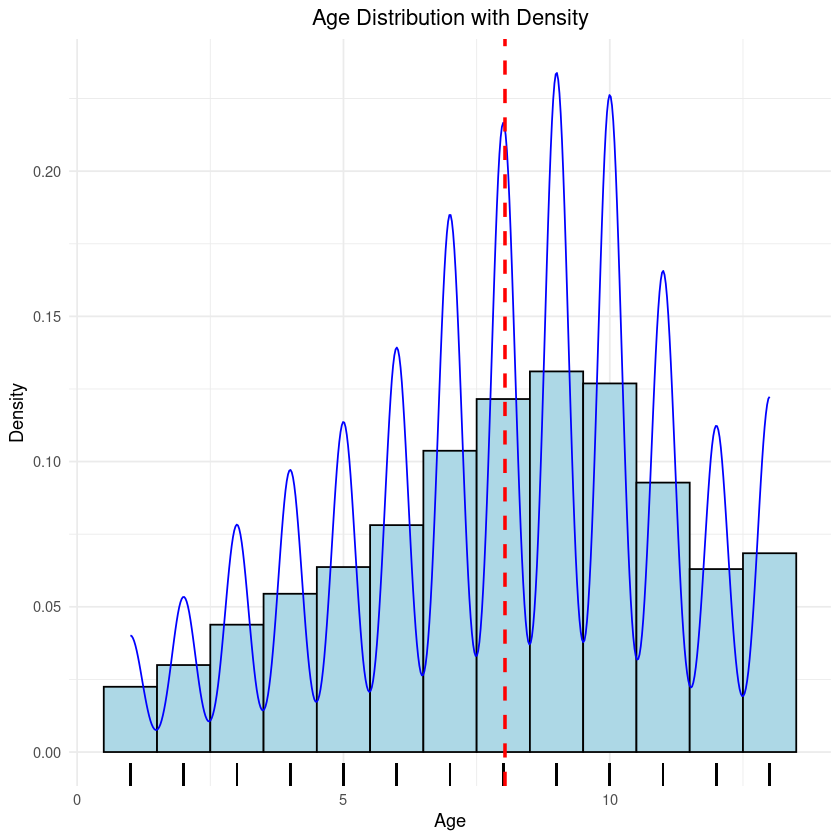

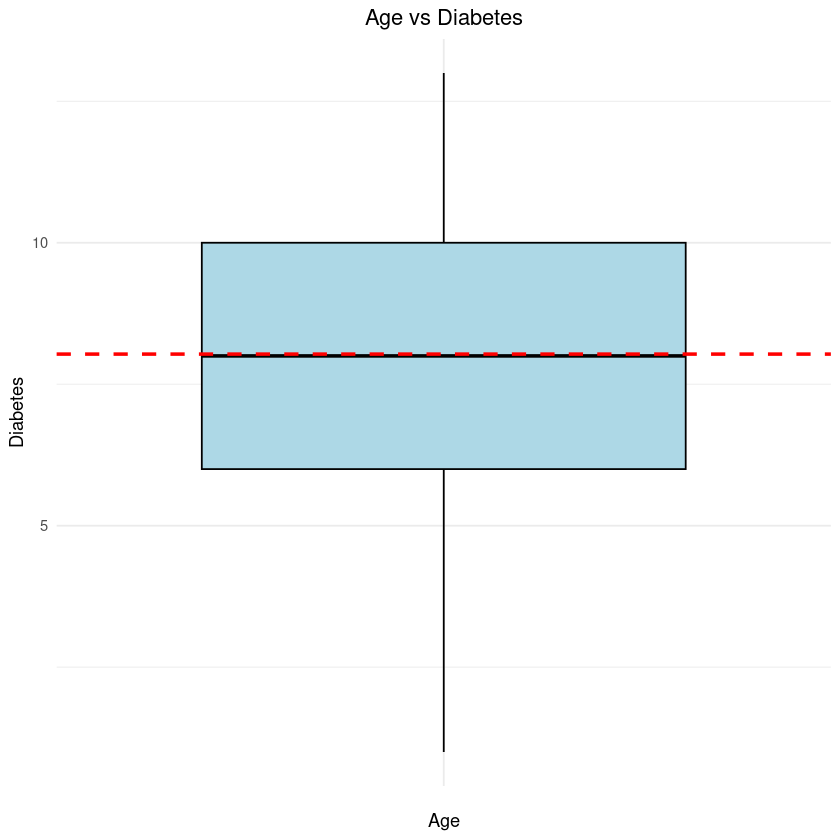

In [123]:
ggplot(data = data, aes(x = age)) + 
    geom_histogram(aes(y = ..density..), binwidth = 1, fill = "lightblue", color = "black", bins = 30) + 
    geom_density(color = "blue", bw = "nrd0", kernel = "gaussian") + 
    geom_rug() +
    labs(title = "Age Distribution with Density", x = "Age", y = "Density") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_vline(aes(xintercept = mean(age)), color = "red", linetype = "dashed", size = 1)

ggplot(data = data, aes(x = "", y = age)) + 
    geom_boxplot(fill = "lightblue", color = "black") + 
    labs(title = "Age vs Diabetes", x = "Age", y = "Diabetes") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_hline(aes(yintercept = mean(age)), color = "red", linetype = "dashed", size = 1)

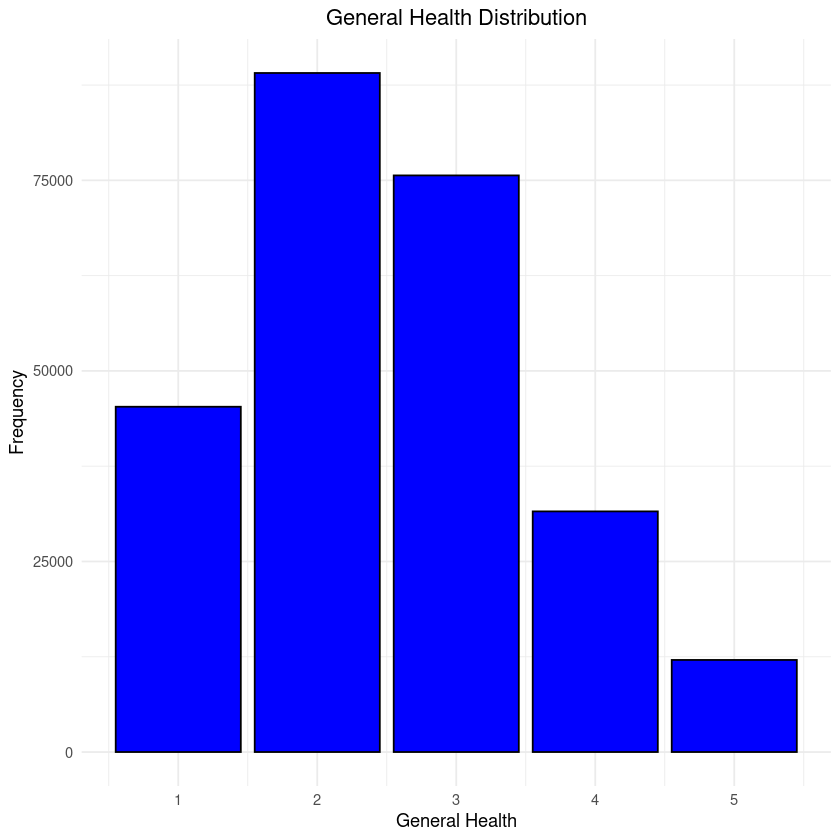

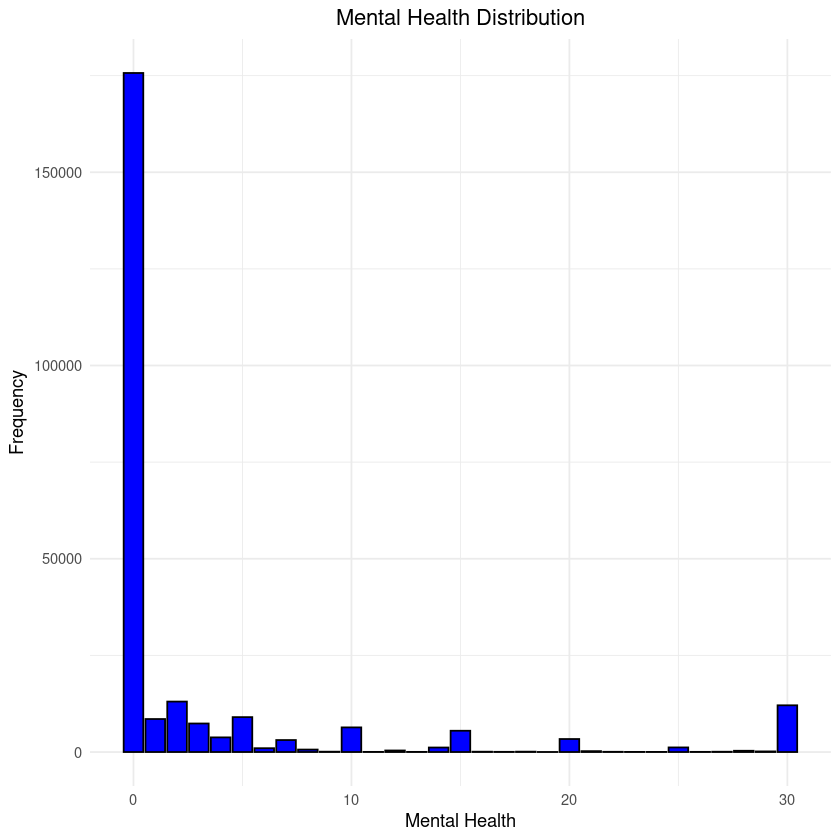

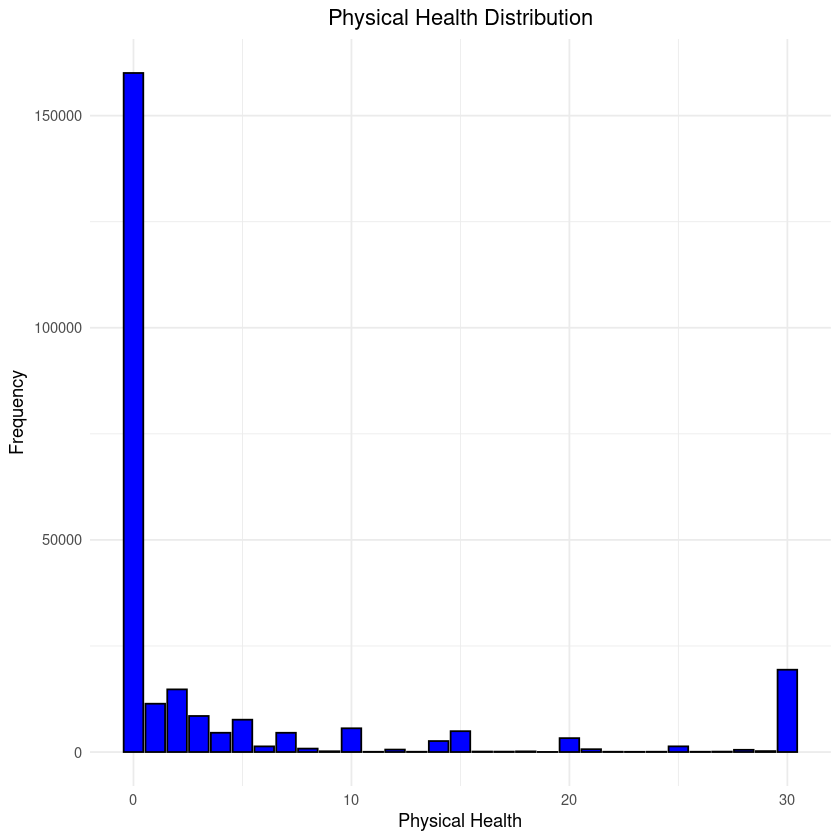

In [124]:
ggplot(data = data, aes(x = gen_hlth)) + 
    geom_bar(fill = "blue", color = "black") +
    labs(title = "General Health Distribution", x = "General Health", y = "Frequency") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

ggplot(data = data, aes(x = ment_hlth)) + 
    geom_bar(fill = "blue", color = "black") +
    labs(title = "Mental Health Distribution", x = "Mental Health", y = "Frequency") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

ggplot(data = data, aes(x = phys_hlth)) +
    geom_bar(fill = "blue", color = "black") +
    labs(title = "Physical Health Distribution", x = "Physical Health", y = "Frequency") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5))

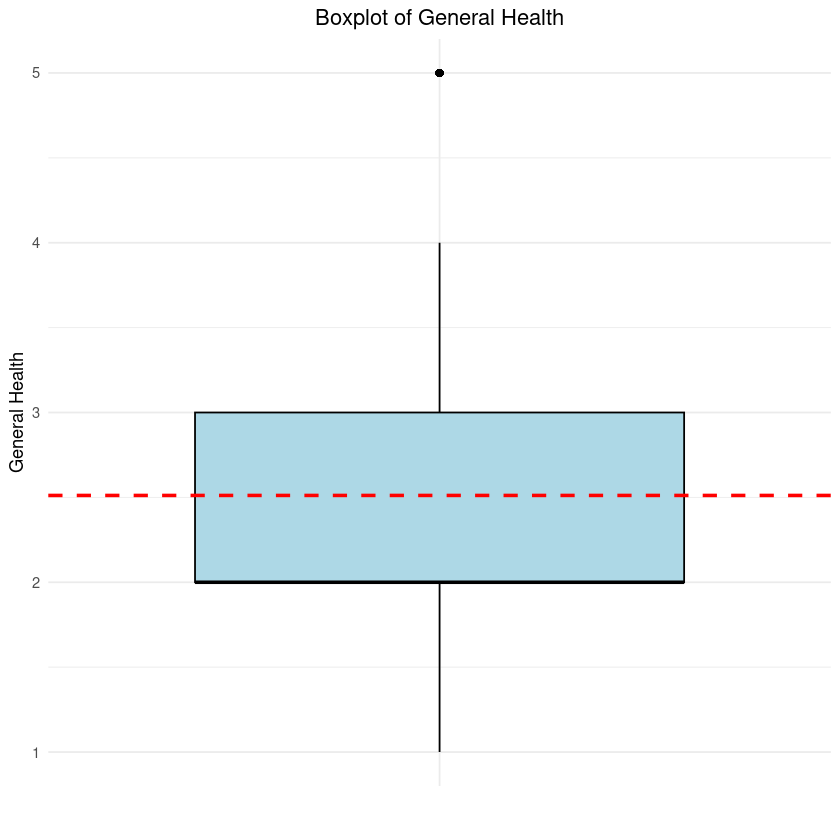

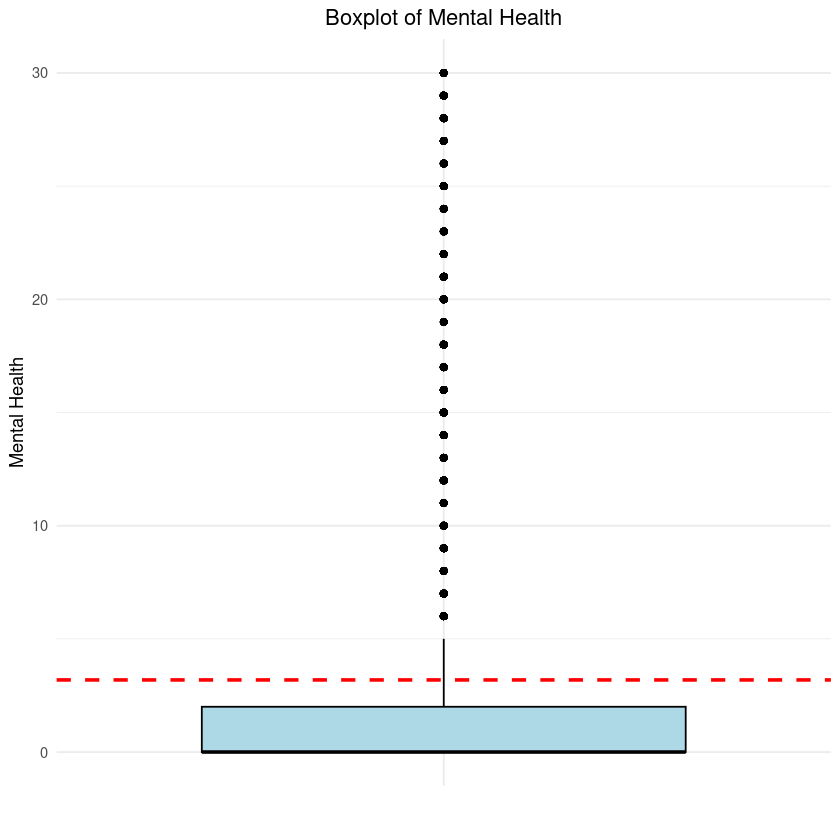

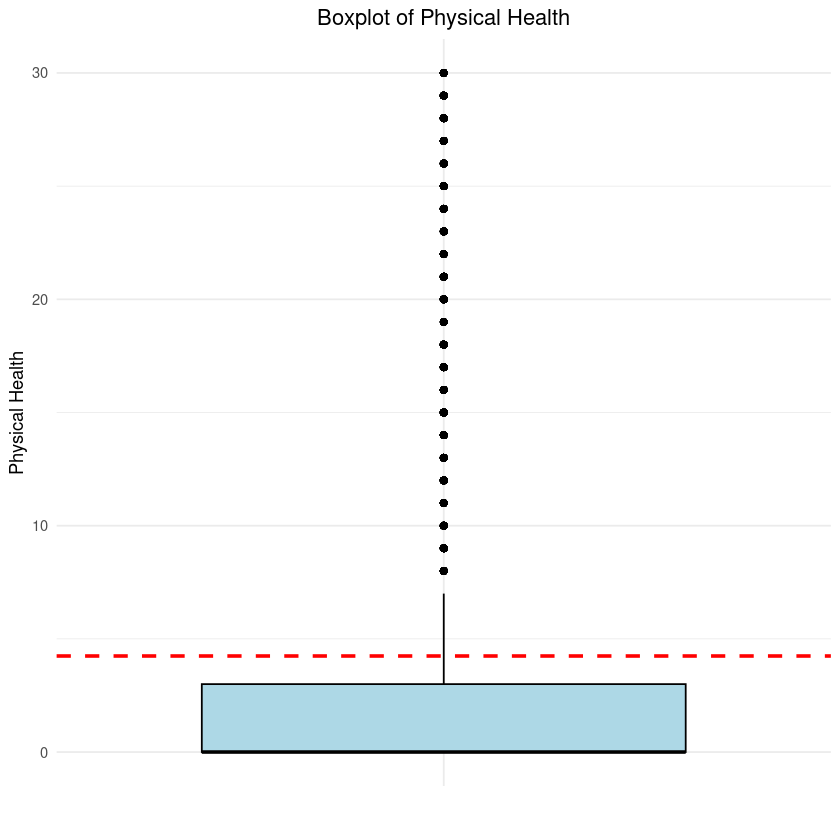

In [125]:
ggplot(data = data, aes(x = "", y = gen_hlth)) + 
    geom_boxplot(fill = "lightblue", color = "black") +
    labs(title = "Boxplot of General Health", x = "", y = "General Health") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_hline(aes(yintercept = mean(gen_hlth)), color = "red", linetype = "dashed", size = 1)

ggplot(data = data, aes(x = "", y = ment_hlth)) + 
    geom_boxplot(fill = "lightblue", color = "black") +
    labs(title = "Boxplot of Mental Health", x = "", y = "Mental Health") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_hline(aes(yintercept = mean(ment_hlth)), color = "red", linetype = "dashed", size = 1)

ggplot(data = data, aes(x = "", y = phys_hlth)) +
    geom_boxplot(fill = "lightblue", color = "black") +
    labs(title = "Boxplot of Physical Health", x = "", y = "Physical Health") +
    theme_minimal() +
    theme(plot.title = element_text(hjust = 0.5)) +
    geom_hline(aes(yintercept = mean(phys_hlth)), color = "red", linetype = "dashed", size = 1)